In [9]:
import pandas as pd
import numpy as np
import json
import gmaps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
from scipy.stats import linregress
import matplotlib.cm as cm
from scipy.stats import norm
import statistics

#from census import Census

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [10]:
path = "CSV statistics/QB_2020.csv"
qb2020 = pd.read_csv(path)
qb2020

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1.0,Josh Allen (BUF),396.0,572.0,69.2,"4,544",7.9,37.0,10.0,26.0,102.0,421,8.0,6.0,16.0,405.7,25.4,99.8%
1,2.0,Kyler Murray (ARI),375.0,558.0,67.2,"3,971",7.1,26.0,12.0,27.0,133.0,819,11.0,4.0,16.0,390.7,24.4,99.6%
2,3.0,Aaron Rodgers (GB),372.0,526.0,70.7,"4,299",8.2,48.0,5.0,20.0,38.0,149,3.0,2.0,16.0,387.6,24.2,96.3%
3,4.0,Patrick Mahomes II (KC),390.0,588.0,66.3,"4,740",8.1,38.0,6.0,22.0,62.0,308,2.0,2.0,15.0,380.3,25.4,99.8%
4,5.0,Deshaun Watson (HOU),382.0,544.0,70.2,"4,823",8.9,33.0,7.0,49.0,90.0,444,3.0,3.0,16.0,376.4,23.5,47.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,143.0,Matt Schaub (FA),0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.0,-4,0.0,0.0,1.0,-0.4,-0.4,0.0%
143,144.0,Nate Sudfeld (SF),5.0,12.0,41.7,32,2.7,0.0,1.0,2.0,2.0,12,0.0,1.0,1.0,-0.5,-0.5,0.0%
144,145.0,Tim Boyle (DET),0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,13.0,-9,0.0,0.0,8.0,-0.9,-0.1,0.1%
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# clean = qb2020.ATT
# quartiles = clean.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq



# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

mask = qb2020.ATT > 100
qb2020 = qb2020[mask]
qb2020.reset_index(drop=True)

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1.0,Josh Allen (BUF),396.0,572.0,69.2,"4,544",7.9,37.0,10.0,26.0,102.0,421,8.0,6.0,16.0,405.7,25.4,99.8%
1,2.0,Kyler Murray (ARI),375.0,558.0,67.2,"3,971",7.1,26.0,12.0,27.0,133.0,819,11.0,4.0,16.0,390.7,24.4,99.6%
2,3.0,Aaron Rodgers (GB),372.0,526.0,70.7,"4,299",8.2,48.0,5.0,20.0,38.0,149,3.0,2.0,16.0,387.6,24.2,96.3%
3,4.0,Patrick Mahomes II (KC),390.0,588.0,66.3,"4,740",8.1,38.0,6.0,22.0,62.0,308,2.0,2.0,15.0,380.3,25.4,99.8%
4,5.0,Deshaun Watson (HOU),382.0,544.0,70.2,"4,823",8.9,33.0,7.0,49.0,90.0,444,3.0,3.0,16.0,376.4,23.5,47.7%
5,6.0,Russell Wilson (SEA),384.0,558.0,68.8,"4,212",7.5,40.0,13.0,47.0,83.0,513,2.0,4.0,16.0,372.6,23.3,96.2%
6,7.0,Ryan Tannehill (TEN),315.0,481.0,65.5,"3,819",7.9,33.0,7.0,24.0,43.0,266,7.0,1.0,16.0,350.8,21.9,87.8%
7,8.0,Tom Brady (TB),401.0,610.0,65.7,"4,633",7.6,40.0,12.0,21.0,30.0,6,3.0,1.0,16.0,350.0,21.9,93.8%
8,9.0,Justin Herbert (LAC),396.0,595.0,66.6,"4,336",7.3,31.0,10.0,32.0,55.0,234,5.0,1.0,15.0,342.8,22.9,95.0%
9,10.0,Lamar Jackson (BAL),242.0,376.0,64.4,"2,757",7.3,26.0,9.0,29.0,159.0,"1,005",7.0,4.0,15.0,341.7,22.8,97.9%


In [20]:
qb2020.describe()

,Rank,CMP,ATT,PCT,Y/A,TD,INT,SACKS,ATT.1,TD.1,FL,G,FPTS,FPTS/G
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.00000,44.000000
mean,22.522727,254.590909,388.068182,64.911364,7.163636,19.000000,8.204545,23.795455,44.000000,2.704545,2.522727,12.181818,215.20000,16.831818
std,12.884981,112.234248,163.453485,4.390011,0.773121,12.155963,3.488050,11.653085,36.224751,2.945865,1.873793,4.116178,111.72208,5.131380
min,1.000000,60.000000,104.000000,52.000000,5.700000,2.000000,0.000000,7.000000,1.000000,0.000000,0.000000,3.000000,34.30000,7.500000
25%,11.750000,179.250000,263.250000,63.475000,6.500000,8.750000,5.000000,14.000000,18.000000,0.750000,1.000000,9.750000,136.37500,12.725000
50%,22.500000,252.500000,397.000000,65.650000,7.300000,16.000000,8.000000,22.000000,34.500000,2.000000,2.000000,14.500000,204.90000,16.850000
75%,33.250000,369.250000,531.750000,67.375000,7.700000,26.250000,11.000000,31.000000,54.250000,3.000000,4.000000,16.000000,299.77500,20.475000
max,45.000000,407.000000,626.000000,72.700000,8.900000,48.000000,15.000000,50.000000,159.000000,12.000000,8.000000,16.000000,405.70000,27.800000


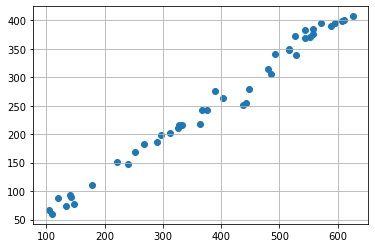

In [21]:
plt.scatter(qb2020.ATT,qb2020.CMP)
plt.grid()
plt.show()

In [44]:
feature = qb2020[['CMP','ATT','Y/A','INT']]
target = qb2020['TD']

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TD   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     44.21
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           5.49e-14
Time:                        15:41:34   Log-Likelihood:                -134.19
No. Observations:                  44   AIC:                             278.4
Df Residuals:                      39   BIC:                             287.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.7519     10.336     -2.008      0.052     -41.658       0.154
CMP            0.0650      0.084      0.772      0.445      -0.105       0.235
ATT            0.0245      0.058      0.419      0.677      -0.094       0.143
Y/A            2.7274      1.461      1.867      0.069      -0.227       5.682
INT           -0.7108      0.375     -1.897      0.065      -1.469       0.047
==============================================================================
Omnibus:                        0.559   Durbin-Watson:                   1.518
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.192
Skew:                           0.156   Prob(JB):                        0.908
Kurtosis:                       3.090   Cond. No.                     6.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-27-f42def4d27bc>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


KeyError: 43

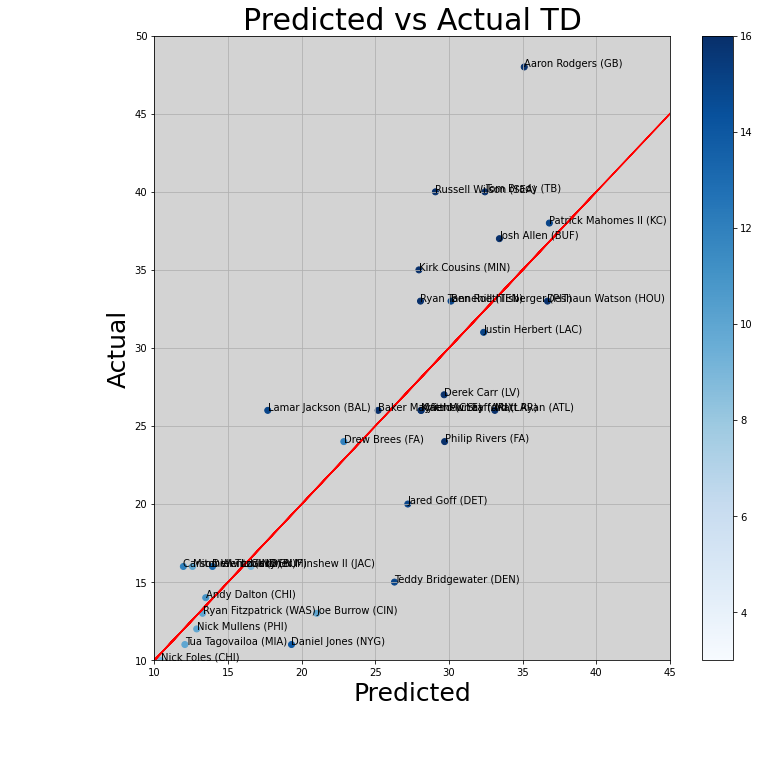

In [27]:
plt.figure(figsize=(10,10))
weight = qb2020.G
plt.scatter(results.fittedvalues, qb2020.TD,marker="o",c= weight,cmap='Blues')

plt.xlim(10,45)
plt.ylim(10,50)
plt.xlabel("Predicted",fontsize=25)
plt.ylabel("Actual",fontsize=25)
plt.title("Predicted vs Actual TD",fontsize=30)
plt.plot(qb2020.TD, qb2020.TD,color='red')
plt.tight_layout()
plt.annotate(f'R squared is: {results.rsquared}',(0,40),fontsize=15)
plt.grid()
plt.colorbar()
ax = plt.axes()
ax.set(facecolor='lightgray')

n = qb2020.Player

for i, txt in enumerate(n):
    plt.annotate(txt, (results.fittedvalues[i], qb2020.TD[i]))
plt.tight_layout()
plt.show()

In [39]:
predicted = results.fittedvalues
actual = qb2020.TD
name = qb2020.Player
games = qb2020.G
difference  = qb2020.TD - results.fittedvalues
qbDict = {'Name':name,'Games':games,'Predicted':predicted,'Actual':actual,'Difference':difference}
predDf = pd.DataFrame(qbDict)

In [42]:
predDf.sort_values('Games',ascending=False)

,Name,Games,Predicted,Actual,Difference
0,Josh Allen (BUF),16.0,33.424185,37.0,3.575815
10,Kirk Cousins (MIN),16.0,27.957828,35.0,7.042172
28,Taysom Hill (NO),16.0,7.508156,4.0,-3.508156
19,Philip Rivers (FA),16.0,29.703591,24.0,-5.703591
16,Baker Mayfield (CLE),16.0,25.191138,26.0,0.808862
14,Matthew Stafford (LAR),16.0,28.098136,26.0,-2.098136
12,Derek Carr (LV),16.0,29.669467,27.0,-2.669467
11,Matt Ryan (ATL),16.0,33.114588,26.0,-7.114588
7,Tom Brady (TB),16.0,32.440280,40.0,7.559720
6,Ryan Tannehill (TEN),16.0,28.065379,33.0,4.934621
